In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
csv_data = pd.read_csv('cardata.csv')
intial_df = pd.DataFrame(csv_data)
intial_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
intial_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
working_df = intial_df.copy()
working_df.drop(columns='Car_Name',inplace=True)
working_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
max_year= np.max(working_df['Year'])
working_df.insert(1,column='Age',value = 0)
working_df['Age'] = max_year - working_df['Year']
working_df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
working_df.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,2.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,4.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,15.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
X = pd.DataFrame(working_df,columns=['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
Y = working_df['Selling_Price'].values.reshape(-1,1)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Fuel_Type', 'Seller_Type', 'Transmission']]), columns=encoder.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission']))
X.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)
X



d:\other\python\IMT\car price estimation\car-price-estimation-\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,5.59,27000,0,0.0,1.0,0.0,1.0
1,5,9.54,43000,0,1.0,0.0,0.0,1.0
2,1,9.85,6900,0,0.0,1.0,0.0,1.0
3,7,4.15,5200,0,0.0,1.0,0.0,1.0
4,4,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
296,2,11.60,33988,0,1.0,0.0,0.0,1.0
297,3,5.90,60000,0,0.0,1.0,0.0,1.0
298,9,11.00,87934,0,0.0,1.0,0.0,1.0
299,1,12.50,9000,0,1.0,0.0,0.0,1.0


In [8]:
correlation_df = pd.DataFrame()
columns = list(X.columns)
for i in range(0,7) :
    for j in range(i+1,8) :
        correlation_factor = np.corrcoef(X.iloc[:,i],X.iloc[:,j])
        correlation_df.loc[columns[i],columns[j]] = correlation_factor[0,1]

correlation_df  


,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Present_Price,NaN,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,NaN,NaN,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,NaN,NaN,NaN,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,NaN,NaN,NaN,NaN,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,NaN,NaN,NaN,NaN,NaN,0.358321,0.091013
Seller_Type_Individual,NaN,NaN,NaN,NaN,NaN,NaN,0.063240


In [9]:
regressor = LinearRegression()

In [10]:
KFold_validation = KFold(n_splits=9,shuffle=True,random_state=True)
result_1 = cross_val_score(regressor,X,Y,cv=KFold_validation)
print(result_1)
print(np.mean(result_1))

[0.75403399 0.90582577 0.90251157 0.90777759 0.90203692 0.82707459
 0.86262541 0.77159498 0.77300571]
0.8451651696395703


In [11]:
grid_parameters = {}
grid_search = GridSearchCV(regressor,grid_parameters,cv=KFold_validation)
grid_search.fit(X,Y)
print(grid_search.best_params_)

{}


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
regressor = LinearRegression()

In [13]:
regressor.fit(X_train,Y_train)
result_2 = regressor.score(X_test,Y_test)
print(result_2)
Y_predict = regressor.predict(X_test)

0.8489813024897566


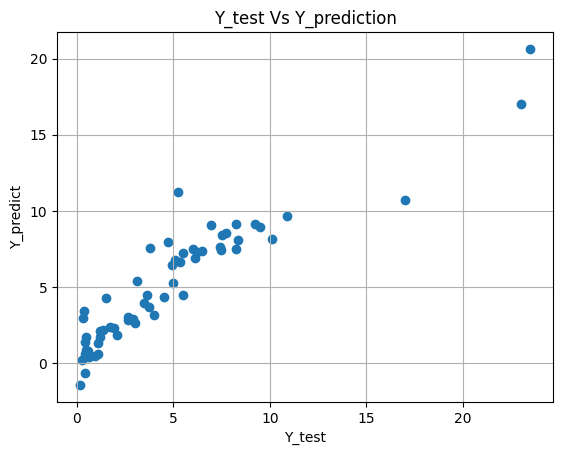

In [14]:
plt.scatter(Y_test,Y_predict)
plt.title('Y_test Vs Y_prediction')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()

In [15]:
X_test
X_test.insert(8,'Y_test',Y_test)
X_test.insert(9,'Y_predict',Y_predict)
age_sorted_df = X_test.sort_values(by='Age')
age_sorted_df

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Y_test,Y_predict
5,0,9.83,2071,0,1.0,0.0,0.0,1.0,9.25,9.118300
97,1,18.64,8700,0,0.0,1.0,0.0,1.0,17.00,10.709708
109,1,1.47,11000,0,0.0,1.0,1.0,1.0,1.20,2.136404
101,1,1.82,1400,0,0.0,1.0,1.0,1.0,1.70,2.345718
158,1,0.54,8600,0,0.0,1.0,1.0,1.0,0.48,1.752070
...,...,...,...,...,...,...,...,...,...,...
90,9,18.61,62000,0,0.0,1.0,0.0,1.0,3.80,7.538240
42,10,7.15,58000,0,0.0,1.0,0.0,1.0,1.95,2.290980
281,12,7.60,50456,0,0.0,1.0,0.0,1.0,2.10,1.822946
92,13,13.70,75000,0,0.0,1.0,0.0,1.0,3.51,3.935852


In [16]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} and Coefficient is equal to : {(coefficient)}')

Intercept is equal to : [4.01823173] and Coefficient is equal to : [[-3.53801365e-01  4.29152503e-01 -6.15725866e-06 -9.03759824e-01
   2.53327258e+00  7.38464226e-01 -1.19059291e+00 -1.63902155e+00]]


In [17]:
compare_df = pd.DataFrame({'Actual':Y_test.flatten(),'Prediction':Y_predict.flatten()})
compare_df

,Actual,Prediction
0,0.35,2.955343
1,10.11,8.178939
2,4.95,6.454273
3,0.15,-1.424175
4,6.95,9.088899
...,...,...
56,5.50,4.474781
57,9.50,8.973776
58,2.10,1.822946
59,7.40,7.604167


In [18]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))
print('R2 Score: ',metrics.r2_score(Y_test,Y_predict))

Mean absolut Errro:  1.216225682129858
Mean squared Error:  3.4788039706413585
Root Mean Squared Error:  1.8651552135523088
R2 Score:  0.8489813024897566


In [29]:
X_copy = X.copy()
poly_Kms_Driven = X.Kms_Driven**2
X_copy.insert(3,'Poly_Kms_Driven',value=poly_Kms_Driven)
X_train,X_test,Y_train,Y_test = train_test_split(X_copy,Y,test_size=0.2,random_state=42)
regressor.fit(X_train,Y_train)
Y_predict = regressor.predict(X_test)


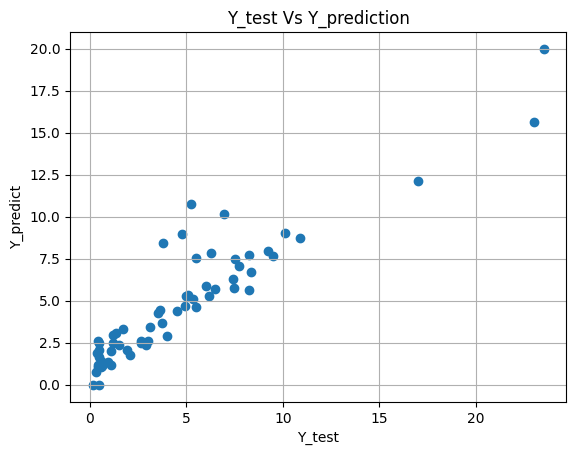

In [30]:
plt.scatter(Y_test,Y_predict)
plt.title('Y_test Vs Y_prediction')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()

In [31]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} and Coefficient is equal to : {(coefficient)}')

Intercept is equal to : [2.75074196] and Coefficient is equal to : [[-3.42511421e-01  5.29927916e-01 -1.75543366e-05  1.11022302e-16
  -5.96653310e-03  1.99046109e-02 -1.97571478e-02 -2.48540512e-02
  -6.63601315e-03]]


In [32]:
compare_df = pd.DataFrame({'Actual':Y_test.flatten(),'Prediction':Y_predict.flatten()})
compare_df

,Actual,Prediction
0,0.35,1.903398
1,10.11,9.053746
2,4.95,4.660985
3,0.15,-0.011635
4,6.95,10.178665
...,...,...
56,5.50,4.638560
57,9.50,7.633874
58,2.10,1.770203
59,7.40,6.286378


In [33]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))
print('R2 Score: ',metrics.r2_score(Y_test,Y_predict))

Mean absolut Errro:  1.3361655397272008
Mean squared Error:  3.901311831136749
Root Mean Squared Error:  1.9751738736467606
R2 Score:  0.8306397726656171


In [24]:
poly = PolynomialFeatures(degree=2)
polynomial_features = poly.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(polynomial_features,Y,test_size=0.2,random_state=42)
regressor.fit(X_train,Y_train)
Y_predict = regressor.predict(X_test)


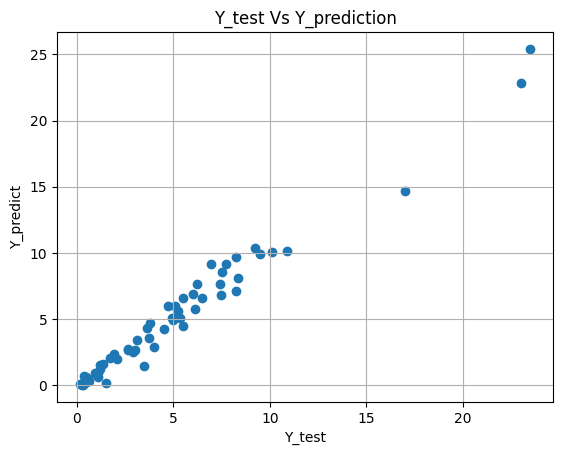

In [25]:
plt.scatter(Y_test,Y_predict)
plt.title('Y_test Vs Y_prediction')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()


In [26]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} and Coefficient is equal to : {(coefficient)}')


Intercept is equal to : [-591.43769021] and Coefficient is equal to : [[ 5.92756208e+02 -9.81405397e-02  6.15284512e-01  1.16527317e-06
   3.96283427e-01 -6.67769884e-01  6.87319553e-01 -1.14949707e+00
  -3.39321338e-01  1.27008586e-02 -5.56431208e-02  1.15659737e-06
  -8.26395191e-03 -2.24988784e-01 -6.25505376e-03 -3.68268697e-02
  -3.55331255e-02 -1.16692120e-03 -1.81044269e-06 -4.25485297e-01
   4.13749484e-01  1.74188439e-01  2.25071596e-01  4.62462696e-02
   3.52972981e-11 -1.48777917e-06 -9.38408223e-06 -2.56795760e-05
  -4.33248399e-06  1.47864200e-05  4.45895029e+00  6.08662153e-01
  -2.12378731e-01 -2.51423620e+00 -1.63505001e+00 -6.67769884e-01
   0.00000000e+00 -1.12749350e+00  6.56969488e-01  6.87319551e-01
  -2.20035747e-02 -9.76741158e-01 -1.14949707e+00  1.65932710e+00
  -3.39321336e-01]]


In [27]:
compare_df = pd.DataFrame({'Actual':Y_test.flatten(),'Prediction':Y_predict.flatten()})
compare_df


,Actual,Prediction
0,0.35,0.013754
1,10.11,10.097666
2,4.95,5.049227
3,0.15,0.082908
4,6.95,9.177603
...,...,...
56,5.50,4.432729
57,9.50,9.948922
58,2.10,2.002039
59,7.40,7.657385


In [28]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))
print('R2 Score: ',metrics.r2_score(Y_test,Y_predict))

Mean absolut Errro:  0.577962921161954
Mean squared Error:  0.6746609118525978
Root Mean Squared Error:  0.8213774478597509
R2 Score:  0.9707122295395482
